In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [6]:
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(include=["int64","float64"]).columns

In [7]:
df["TotalCharges"].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isna().sum()

np.int64(11)

In [9]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)
df["TotalCharges"].isna().sum()

np.int64(0)

In [10]:
df.groupby("Churn")["tenure"].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [11]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [12]:
df.groupby("Churn")["Contract"].value_counts(normalize=True)

Churn  Contract      
No     Month-to-month    0.429068
       Two year          0.318322
       One year          0.252609
Yes    Month-to-month    0.885500
       One year          0.088818
       Two year          0.025682
Name: proportion, dtype: float64

In [13]:
df.groupby("Churn")["InternetService"].value_counts(normalize=True)

Churn  InternetService
No     DSL                0.379204
       Fiber optic        0.347700
       No                 0.273096
Yes    Fiber optic        0.693954
       DSL                0.245586
       No                 0.060460
Name: proportion, dtype: float64

In [14]:
df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [15]:
df.groupby("Churn")["PaymentMethod"].value_counts(normalize=True)

Churn  PaymentMethod            
No     Mailed check                 0.252029
       Electronic check             0.250097
       Credit card (automatic)      0.249324
       Bank transfer (automatic)    0.248550
Yes    Electronic check             0.573034
       Mailed check                 0.164794
       Bank transfer (automatic)    0.138042
       Credit card (automatic)      0.124131
Name: proportion, dtype: float64

In [16]:
df.groupby("PaymentMethod")["Churn"].value_counts(normalize=True).unstack()

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [17]:
(df["Churn"] == "Yes").groupby(df["PaymentMethod"]).mean().sort_values(ascending=False)

PaymentMethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: Churn, dtype: float64

In [18]:
df["PaperlessBilling"].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [19]:
df.groupby("Churn")["PaperlessBilling"].value_counts(normalize=True)

Churn  PaperlessBilling
No     Yes                 0.535562
       No                  0.464438
Yes    Yes                 0.749064
       No                  0.250936
Name: proportion, dtype: float64

In [20]:
df.groupby("PaperlessBilling")["Churn"].value_counts(normalize=True).unstack()

Churn,No,Yes
PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651


In [21]:
(df["Churn"] == "Yes").groupby(df["PaperlessBilling"]).mean()

PaperlessBilling
No     0.163301
Yes    0.335651
Name: Churn, dtype: float64

In [22]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [23]:
df.groupby("Churn")["SeniorCitizen"].value_counts(normalize=True)

Churn  SeniorCitizen
No     0                0.871279
       1                0.128721
Yes    0                0.745318
       1                0.254682
Name: proportion, dtype: float64

In [24]:
df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack()

Churn,No,Yes
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


In [25]:
(df["Churn"] == "Yes").groupby(df["SeniorCitizen"]).mean()

SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64

In [26]:
#cuhrn edenler ortalama kaç aydır müşteri?
df.groupby("Churn")["tenure"].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [27]:
#churn eden müşteriler hangş tenure aralığında yoğunlaşıyor?
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

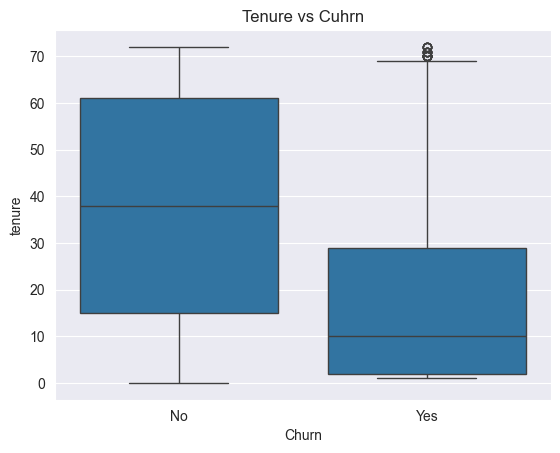

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Tenure vs Cuhrn")
plt.show()

Tenure - Churn Analizi

Churn eden müşteriler, churn etmeyenlere kıyasla şirkette çok daha kısa süre kalmaktadır. Özellikle ilk yıl churn açısından kiritik bir dönemdir.

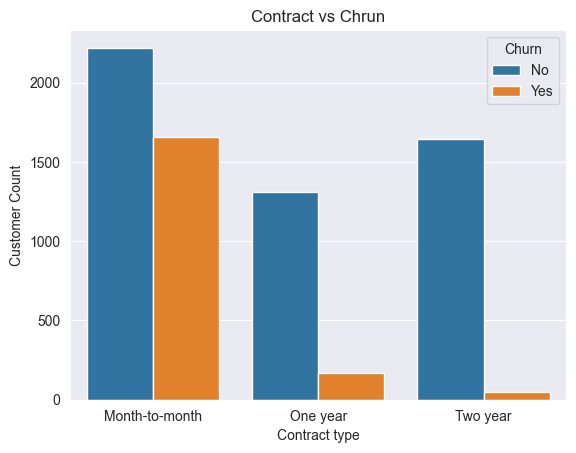

In [29]:
#hangi sözleşme türünde churn daha fazla?
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract vs Chrun")
plt.xlabel("Contract type")
plt.ylabel("Customer Count")
plt.show()

Contract - Churn Analizi

Month-to-month sözleşmeye sahip müşterilerde churn oranı diğer sözleşme türlerine kıyasla belirgin şekilde daha yüksektir. One year ve Two year sözleşmelerde churn oranının oldukça düşük olması, uzun vadeli sözleşmelerin müşteri bağlılığını artırdığını göstermektedir.

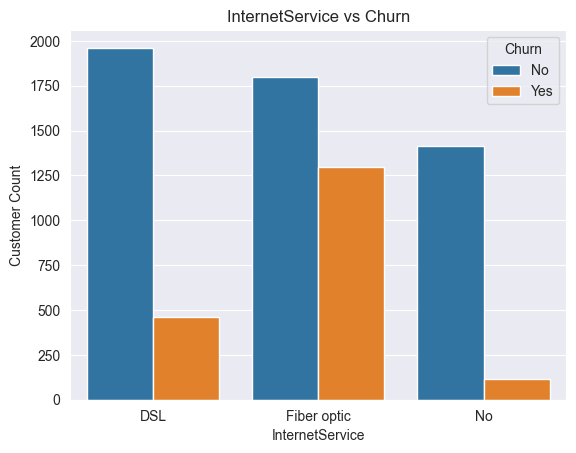

In [30]:
#hangi internet hizmetinde churn daha fazla?
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("InternetService vs Churn")
plt.xlabel("InternetService")
plt.ylabel("Customer Count")
plt.show()

InternetService – Churn Analizi

Fiber optic internet hizmetini kullanan müşterilerde churn oranı diğer hizmet türlerine kıyasla daha yüksektir. DSL kullanıcılarının churn oranı daha düşükken, internet hizmeti almayan müşterilerde churn oranı en düşüktür.

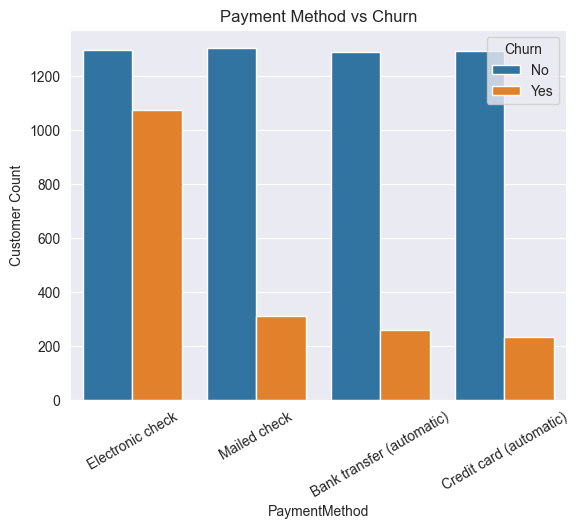

In [31]:
#hangi ödeme yönteminde churn daha fazla?
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.title("Payment Method vs Churn")
plt.xlabel("PaymentMethod")
plt.ylabel("Customer Count")
plt.xticks(rotation=30)
plt.show()


PaymentMethod - Churn Analizi

Electronic check kullanan müşterilerde churn oranı diğer ödeme yöntemlerine kıyasla belirgin şekilde daha yüksektir. Otomatik ödeme yöntemlerini (kredi kartı veya banka transferi) kullanan müşterilerde churn oranının daha düşük olması, otomatik ödeme kullanımının müşteri bağlılığını artırdığını göstermektedir.

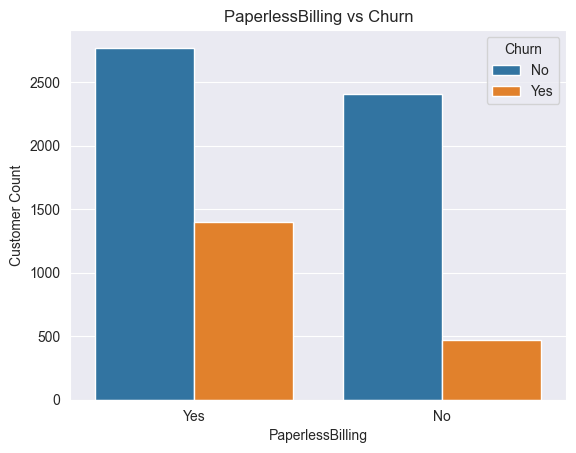

In [33]:
#Kağıtsızfatura(paperlessbilling) kullanan müşteriler mi daha çok churn ediyor, yoksa kullanmayanlar mı?
sns.countplot(data=df, x="PaperlessBilling", hue="Churn")
plt.title("PaperlessBilling vs Churn")
plt.xlabel("PaperlessBilling")
plt.ylabel("Customer Count")
plt.show()

PaperlessBilling - Churn Analizi

PaperlessBilling kullanan müşterilerde churn oranı, kağıt fatura kullanan müşterilere kıyasla daha yüksektir. Bu durum, dijital fatura kullanan müşteri grubunun daha ayrılmaya yatkın olabileceğini göstermektedir.

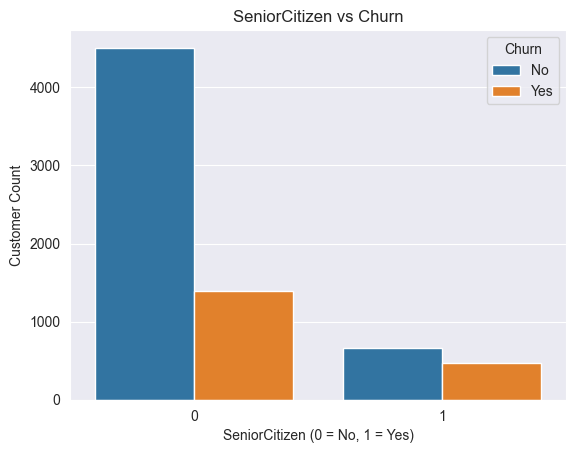

In [34]:
#yaşlı müşteriler(SeniorCitizen) mi daha çok churn ediyor, yoksa diğerleri mi?
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.title("SeniorCitizen vs Churn")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.show()

SeniorCitizen - Churn Analizi

SeniorCitizen grubundaki müşterilerde churn oranı, senior olmayan müşterilere kıyasla daha yüksektir. Bu durum, yaşlı müşteri segmentinde beklentilerin farklı olabileceğini ve bu grubun özel hizmet veya kampanyalarla elde tutulmasının önemli olduğunu göstermektedir.

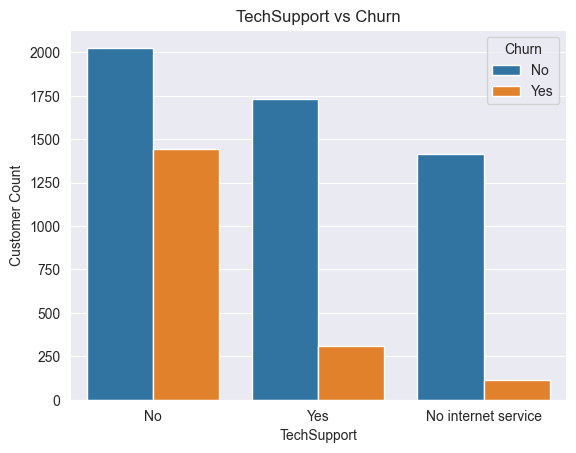

In [36]:
#Teknik destek almayan müşteri daha mı çok ayrılıyor?
sns.countplot(data=df, x="TechSupport", hue="Churn")
plt.title("TechSupport vs Churn")
plt.xlabel("TechSupport")
plt.ylabel("Customer Count")
plt.show()

TechSupport - Churn Analizi

Teknik destek hizmeti almayan müşterilerde churn oranı, teknik destek alan müşterilere kıyasla belirgin şekilde daha yüksektir. Bu durum, teknik destek hizmetinin müşteri memnuniyeti ve şirkete olan bağlılığı artırmada kritik bir rol oynadığını göstermektedir.

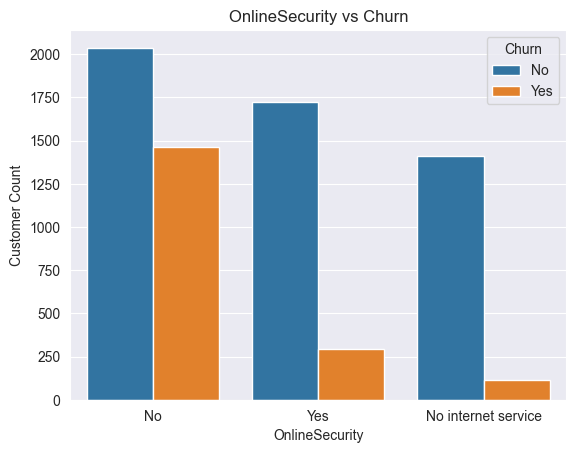

In [37]:
#online güvenlik hizmeti almayan müşteriler daha mı çok churn ediyor?
sns.countplot(data=df, x="OnlineSecurity", hue="Churn")
plt.title("OnlineSecurity vs Churn")
plt.xlabel("OnlineSecurity")
plt.ylabel("Customer Count")
plt.show()

OnlineSecurity - Churn Analizi

Online güvenlik hizmeti almayan müşterilerde churn oranı, online güvenlik hizmeti alan müşterilere kıyasla belirgin şekilde daha yüksektir. Bu durum, müşterilere sunulan ek güvenlik hizmetlerinin müşteri bağlılığını artırdığını göstermektedir.

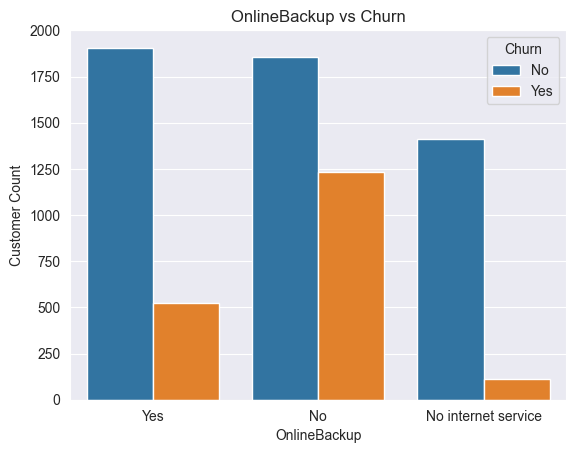

In [38]:
#online yedekleme hizmeti almayan müşteriler daha mı çok churn ediyor?
sns.countplot(data=df, x="OnlineBackup", hue="Churn")
plt.title("OnlineBackup vs Churn")
plt.xlabel("OnlineBackup")
plt.ylabel("Customer Count")
plt.show()

OnlineBackup - Churn Analizi

Online yedekleme hizmeti almayan müşterilerde churn oranı, online yedekleme hizmeti alan müşterilere kıyasla daha yüksektir. Bu sonuç, müşterilere sunulan ek hizmetlerin müşteri bağlılığını artırdığını göstermektedir.

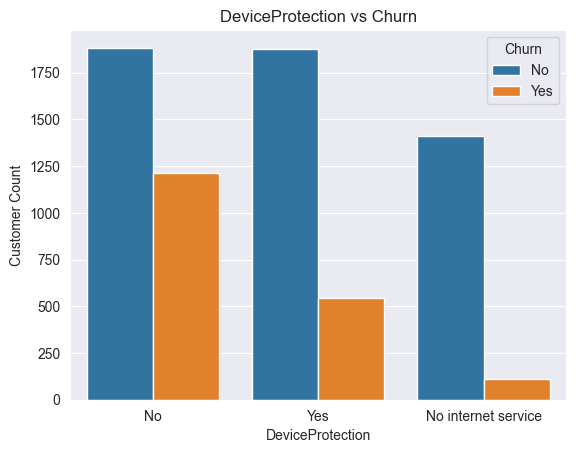

In [39]:
#Cihaz koruma hizmeti (DeviceProtection) almayan müşteriler daha mı çok churn ediyor?
sns.countplot(data=df, x="DeviceProtection", hue="Churn")
plt.title("DeviceProtection vs Churn")
plt.xlabel("DeviceProtection")
plt.ylabel("Customer Count")
plt.show()

DeviceProtection - Churn Analizi

Cihaz koruma hizmeti almayan müşterilerde churn oranı, cihaz koruma hizmeti alan müşterilere kıyasla daha yüksektir. Bu durun, müşterilere sunulan ek hizmetlerin müşteri bağlılığını artırmada önemli bir rol oynadığını göstermektedir.

 ## EDA SONUÇ ÖZETİ (Key Insights)

- Churn eden müşteriler, churn etmeyen müşterilere kıyasla şirkette daha kısa süre kalmaktadır. Özellikle ilk yıl churn açısından kritik bir dönemdir.
- Month-to-month sözleşmeye sahip müşterilerde churn oranı, uzun vadeli sözleşmelere ( One year, Two year) kıyasla belirgin şekilde daha yüksektir.
- Electronic check kullanan müşterilerde churn oranı diğer ödeme yöntemlerine göre daha yüksektir. Otomatik ödeme yöntemleri churn riskini azaltmaktadır.
- Teknik destek (TechSupport) hizmeti almayan müşterilerde churn oranı önemli ölçüde daha yüksektir.
- OnlineSecurity, OnlineBackup ve DeviceProtection gibi ek hizmetleri almayan müşterilerde churn oranının arttığı gözlemlenmiştir.
- SeniorCitizen grubundaki müşterilerde churn oranı, senior olmayan müşterilere kıyasla daha yüksektir.